**Abstract**

We present a state-of-the-art speech recognition system developed using end-to-end deep learning. Our architecture is significantly simpler than traditional speechsystems, which rely on laboriously engineered processing pipelines; these tradi-tional systems also tend to perform poorly when used in noisy environments.  Incontrast,  our  system  does  not  need  hand-designed  components  to  model  back-ground  noise,  reverberation,  or  speaker  variation,  but  instead  directly  learns  afunction  that  is  robust  to  such  effects.   We  do  not  need  a  phoneme  dictionary,nor even the concept of a “phoneme.”  Key to our approach is a well-optimizedRNN training system that uses multiple GPUs, as well as a set of novel data syn-thesis techniques that allow us to efficiently obtain a large amount of varied datafor training.  Our system, called Deep Speech, outperforms previously publishedresults on the widely studied Switchboard Hub5’00, achieving 16.0% error on thefull test set. Deep Speech also handles challenging noisy environments better thanwidely used, state-of-the-art commercial speech systems.

![Deepspeech Model](https://miro.medium.com/max/2624/1*BN2rY_mP_uThoJk1i8h0uA.png)


In [1]:
import os
from os.path import exists, join, basename, splitext

if not exists('deepspeech-0.6.1-models'):
  !apt-get install -qq sox
  !pip install -q deepspeech-gpu==0.6.1 youtube-dl
  !wget https://github.com/mozilla/DeepSpeech/releases/download/v0.6.1/deepspeech-0.6.1-models.tar.gz
  !tar xvfz deepspeech-0.6.1-models.tar.gz
  
from IPython.display import YouTubeVideo

Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 144611 files and directories currently installed.)
Preparing to unpack .../0-libopencore-amrnb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack .../1-libopencore-amrwb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrwb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libmagic-mgc.
Preparing to unpack .../2-libmagic-mgc_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic-mgc (1:5.32-2ubuntu0.4) ...
Selecting previously unselected package libmagic1:amd64.
Preparing to unpack .../3-libmagic1_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic1:amd64 (1:5.32-2ubuntu0.4) ...
Selecting previously unselected package libsox3:amd64.
Preparing to unpack .../4-libsox3_14.4.2-3ubuntu0.18.04.1_amd64.deb ...
Unpacking libsox3:amd64 (14.4.2-3ubuntu0.18.04.1) ...
Selecting previously un

In [2]:
!curl -LO https://github.com/mozilla/DeepSpeech/releases/download/v0.6.0/audio-0.6.0.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   642  100   642    0     0   2931      0 --:--:-- --:--:-- --:--:--  2931
100  192k  100  192k    0     0   346k      0 --:--:-- --:--:-- --:--:--  346k


In [3]:
!tar -xvzf audio-0.6.0.tar.gz

audio/
audio/2830-3980-0043.wav
audio/Attribution.txt
audio/4507-16021-0012.wav
audio/8455-210777-0068.wav
audio/License.txt


In [4]:
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile
import scipy.io

In [6]:
audio_file = 'audio/2830-3980-0043.wav'

#listen to audio
samplerate, ds = scipy.io.wavfile.read(audio_file) 
Audio(ds ,rate=samplerate)

In [7]:
!deepspeech --model deepspeech-0.6.1-models/output_graph.pbmm --lm deepspeech-0.6.1-models/lm.binary --trie deepspeech-0.6.1-models/trie --audio audio/2830-3980-0043.wav

Loading model from file deepspeech-0.6.1-models/output_graph.pbmm
TensorFlow: v1.14.0-21-ge77504a
DeepSpeech: v0.6.1-0-g3df20fe
2020-10-21 10:15:11.348997: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-10-21 10:15:11.350123: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2020-10-21 10:15:11.371636: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-21 10:15:11.372324: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 0 with properties: 
name: Tesla P4 major: 6 minor: 1 memoryClockRate(GHz): 1.1135
pciBusID: 0000:00:04.0
2020-10-21 10:15:11.372364: I tensorflow/stream_executor/platform/default/dlopen_checker_stub.cc:25] GPU libraries are statically lin

In [8]:
audio_file = 'audio/4507-16021-0012.wav'

#listen to audio
samplerate, ds = scipy.io.wavfile.read(audio_file) 
Audio(ds ,rate=samplerate)

In [9]:
!deepspeech --model deepspeech-0.6.1-models/output_graph.pbmm --lm deepspeech-0.6.1-models/lm.binary --trie deepspeech-0.6.1-models/trie --audio audio/4507-16021-0012.wav

Loading model from file deepspeech-0.6.1-models/output_graph.pbmm
TensorFlow: v1.14.0-21-ge77504a
DeepSpeech: v0.6.1-0-g3df20fe
2020-10-21 10:15:27.270939: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-10-21 10:15:27.271967: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2020-10-21 10:15:27.293946: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-21 10:15:27.294542: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 0 with properties: 
name: Tesla P4 major: 6 minor: 1 memoryClockRate(GHz): 1.1135
pciBusID: 0000:00:04.0
2020-10-21 10:15:27.294564: I tensorflow/stream_executor/platform/default/dlopen_checker_stub.cc:25] GPU libraries are statically lin

In [10]:
audio_file = 'audio/8455-210777-0068.wav'

#listen to audio
samplerate, ds = scipy.io.wavfile.read(audio_file) 
Audio(ds ,rate=samplerate)

In [11]:
!deepspeech --model deepspeech-0.6.1-models/output_graph.pbmm --lm deepspeech-0.6.1-models/lm.binary --trie deepspeech-0.6.1-models/trie --audio audio/8455-210777-0068.wav

Loading model from file deepspeech-0.6.1-models/output_graph.pbmm
TensorFlow: v1.14.0-21-ge77504a
DeepSpeech: v0.6.1-0-g3df20fe
2020-10-21 10:15:47.875096: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-10-21 10:15:47.876110: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2020-10-21 10:15:47.894119: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-21 10:15:47.894547: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 0 with properties: 
name: Tesla P4 major: 6 minor: 1 memoryClockRate(GHz): 1.1135
pciBusID: 0000:00:04.0
2020-10-21 10:15:47.894568: I tensorflow/stream_executor/platform/default/dlopen_checker_stub.cc:25] GPU libraries are statically lin

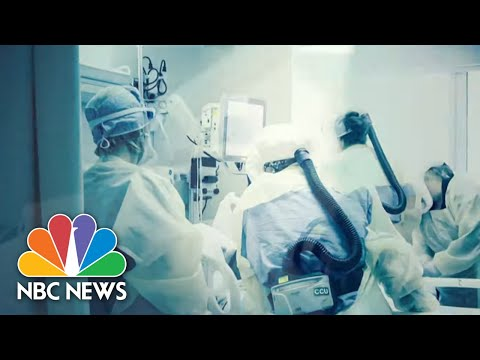

In [12]:
YOUTUBE_ID = 'b51GOCP1Qoc'


YouTubeVideo(YOUTUBE_ID)

In [13]:
!rm -rf *.wav
!youtube-dl --extract-audio --audio-format wav --output "test.%(ext)s" https://www.youtube.com/watch\?v\={YOUTUBE_ID}
!deepspeech --model deepspeech-0.6.1-models/output_graph.pbmm --lm deepspeech-0.6.1-models/lm.binary --trie deepspeech-0.6.1-models/trie --audio test.wav

[youtube] b51GOCP1Qoc: Downloading webpage
[download] Destination: test.webm
[download] 100% of 1.85MiB in 00:00
[ffmpeg] Destination: test.wav
Deleting original file test.webm (pass -k to keep)
Loading model from file deepspeech-0.6.1-models/output_graph.pbmm
TensorFlow: v1.14.0-21-ge77504a
DeepSpeech: v0.6.1-0-g3df20fe
2020-10-21 10:16:04.246358: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-10-21 10:16:04.247432: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2020-10-21 10:16:04.265252: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-21 10:16:04.265638: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 0 with properties: 
name: Tesla P4 major: 6